# **Sobre o projeto**

## **Introdução**
Neste projeto, desenvolvi uma análise abrangente das vendas de veículos com base em um conjunto de dados detalhado. Através deste projeto, explorei diversos aspectos do mercado automotivo, desde a identificação de tendências de vendas até a compreensão dos fatores que influenciam os preços de venda dos veículos.

## **Conjunto de Dados**
O conjunto de dados utilizado neste projeto é denominado "Vehicle Sales and Market Trends Dataset". Este conjunto de dados abrange uma ampla gama de informações relacionadas às transações de vendas de veículos, incluindo detalhes sobre os veículos vendidos, informações de transações, tendências de mercado e muito mais.

## **Desenvolvimento**
Ao longo do projeto, desenvolvi uma série de perguntas de negócios relevantes e utilizei técnicas de análise de dados para encontrar respostas significativas. Através da aplicação de métodos estatísticos e visualizações de dados, explorei os padrões subjacentes nos dados e obtive insights valiosos sobre o mercado automotivo.

## **Principais Perguntas de Negócio Resolvidas**

*   Quais são os modelos de carros mais vendidos em determinado estado?
*   Existe uma correlação entre a condição do veículo e seu preço de venda?

*   Qual é a relação entre a quilometragem (odômetro) e o preço de venda?
*   Qual é a distribuição de preços de venda dos veículos por modelo?
*   Qual é a média de desvalorização dos carros ao longo do tempo?
*   Há uma preferência de cores de carro que afeta os preços de venda?
*   Como o preço de venda se compara com o valor estimado pelo MMR (Manheim Market Report)?
*   Quais modelos de carros têm a menor depreciação ao longo do tempo?
*   Qual é a relação entre o tipo de transmissão do veículo e seu preço de venda?





## **Conclusão**
Este projeto proporcionou uma compreensão aprofundada das tendências e padrões no mercado de vendas de veículos. Através da análise dos dados e da resolução das perguntas de negócio, pude obter insights valiosos que podem ser utilizados para orientar estratégias de negócio e tomada de decisões na indústria automotiva.

# **Capturando e Analisando Dados**

In [1]:
import pandas as pd


In [2]:
cars = pd.read_csv('car_prices.csv')

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26720 entries, 0 to 26719
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          26720 non-null  int64  
 1   make          26589 non-null  object 
 2   model         26588 non-null  object 
 3   trim          26472 non-null  object 
 4   body          25810 non-null  object 
 5   transmission  23658 non-null  object 
 6   vin           26720 non-null  object 
 7   state         26720 non-null  object 
 8   condition     19003 non-null  float64
 9   odometer      26685 non-null  float64
 10  color         26641 non-null  object 
 11  interior      26641 non-null  object 
 12  seller        26720 non-null  object 
 13  mmr           26720 non-null  int64  
 14  sellingprice  26720 non-null  int64  
 15  saledate      26720 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 3.3+ MB


In [22]:
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# **Quais são os modelos de carros mais vendidos na Califórnia?**

In [23]:
carsca = cars[cars['state'] == 'ca']

In [25]:
modelo_mais_vendido = carsca.groupby('model').size().reset_index(name='vendas')

In [27]:
modelo_mais_vendido = modelo_mais_vendido.sort_values(by='vendas', ascending=False)

In [28]:
print("Os 5 modelos de carros mais vendidos na Califórnia:")
print(modelo_mais_vendido.head(5))

Os 5 modelos de carros mais vendidos na Califórnia:
        model  vendas
5    3 Series     281
205   G Sedan     249
41     Altima     221
103     Civic     165
38     Accord     159


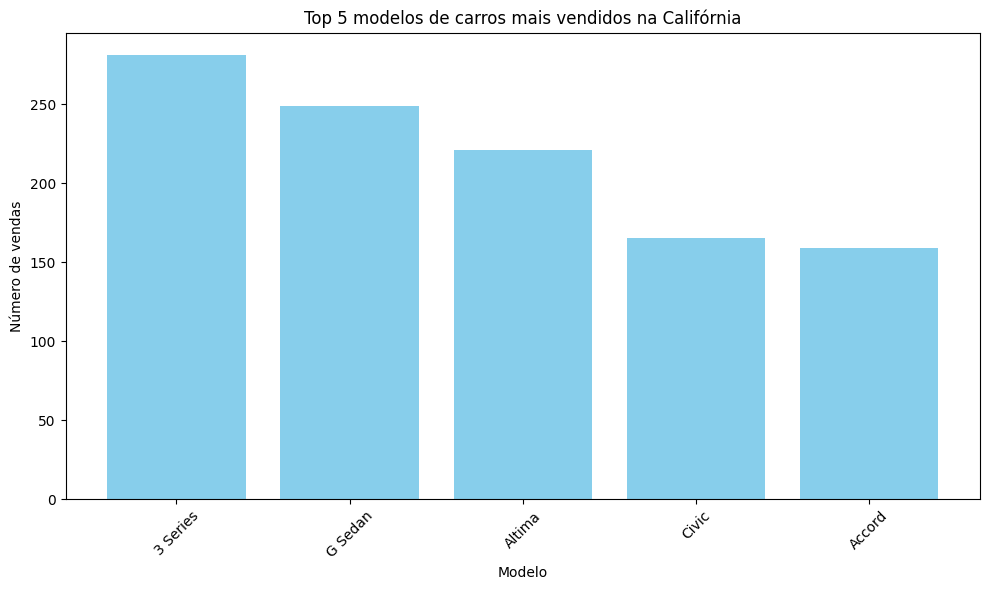

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.bar(modelo_mais_vendido['model'][:5], modelo_mais_vendido['vendas'][:5], color='skyblue')

plt.title('Top 5 modelos de carros mais vendidos na Califórnia')
plt.xlabel('Modelo')
plt.ylabel('Número de vendas')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

# **Qual é a relação entre a quilometragem (odômetro) e o preço de venda?**

In [34]:

cars.dropna(subset=['odometer', 'sellingprice'], inplace=True)

correlation = cars['odometer'].corr(cars['sellingprice'])
print("Correlação entre a quilometragem e o preço de venda:", correlation)


Correlação entre a quilometragem e o preço de venda: -0.583254581831169


Isso indica que a tendência de que, à medida que a quilometragem de um carro aumenta, o preço de venda tende a diminuir.

# **Qual é a distribuição de preços de venda dos veículos por modelo?**

<Figure size 1200x600 with 0 Axes>

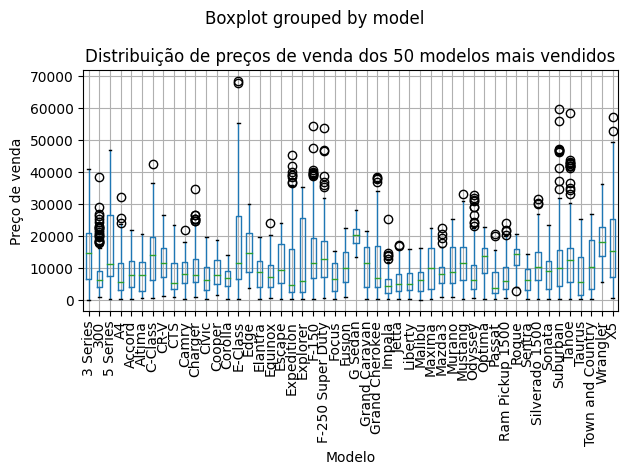

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'cars' seja o DataFrame que contém seus dados

# Passo 1: Identificar os 10 modelos mais vendidos
top_50_models = cars['model'].value_counts().head(50).index.tolist()

# Passo 2: Filtrar o DataFrame para incluir apenas os 10 modelos mais vendidos
top_50_cars = cars[cars['model'].isin(top_50_models)]

# Passo 3: Criar um boxplot dos preços de venda para os 10 modelos mais vendidos
plt.figure(figsize=(12, 6))
top_50_cars.boxplot(column='sellingprice', by='model', rot=90)
plt.title('Distribuição de preços de venda dos 50 modelos mais vendidos')
plt.xlabel('Modelo')
plt.ylabel('Preço de venda')
plt.tight_layout()
plt.show()


# **Qual é a média de desvalorização dos carros ao longo do tempo?**

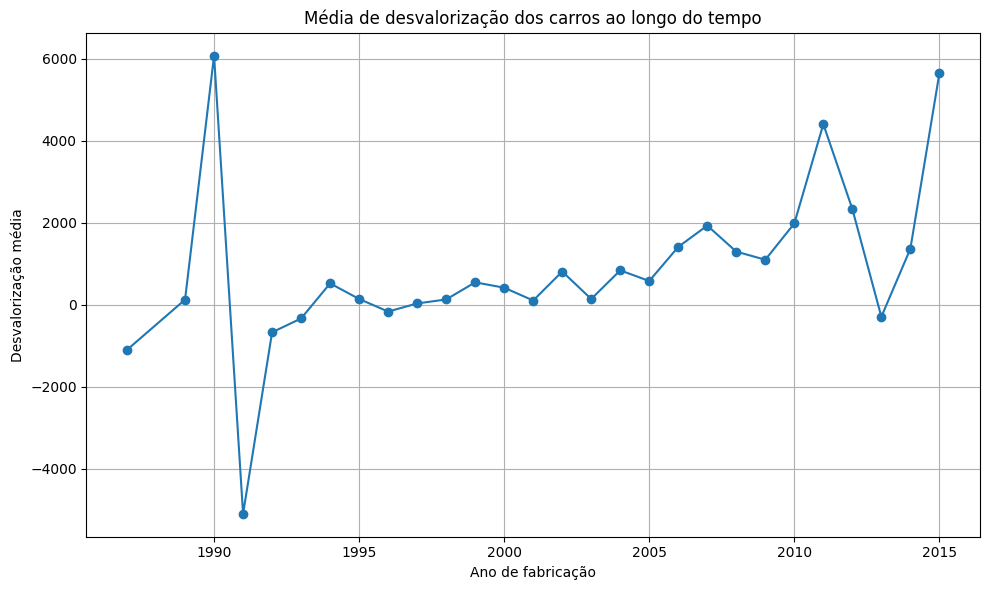

In [44]:
average_price_by_year = cars.groupby('year')['sellingprice'].mean().reset_index()

average_price_by_year['depreciation'] = average_price_by_year['sellingprice'].diff()

plt.figure(figsize=(10, 6))
plt.plot(average_price_by_year['year'], average_price_by_year['depreciation'], marker='o')
plt.title('Média de desvalorização dos carros ao longo do tempo')
plt.xlabel('Ano de fabricação')
plt.ylabel('Desvalorização média')
plt.grid(True)
plt.tight_layout()
plt.show()


O aumento observado na média de desvalorização dos carros ao longo do tempo pode ser explicado por uma combinação de fatores, incluindo a obsolescência tecnológica, mudanças nas preferências do consumidor e condições econômicas gerais. À medida que os carros envelhecem, tornam-se mais propensos a sofrer desgaste físico e a ficar defasados em relação aos avanços tecnológicos, o que pode acelerar sua depreciação. Além disso, condições econômicas adversas podem diminuir a demanda por carros usados, resultando em uma redução dos preços de venda médios ao longo do tempo.

# **Há uma preferência de cores de carro que afeta os preços de venda?**

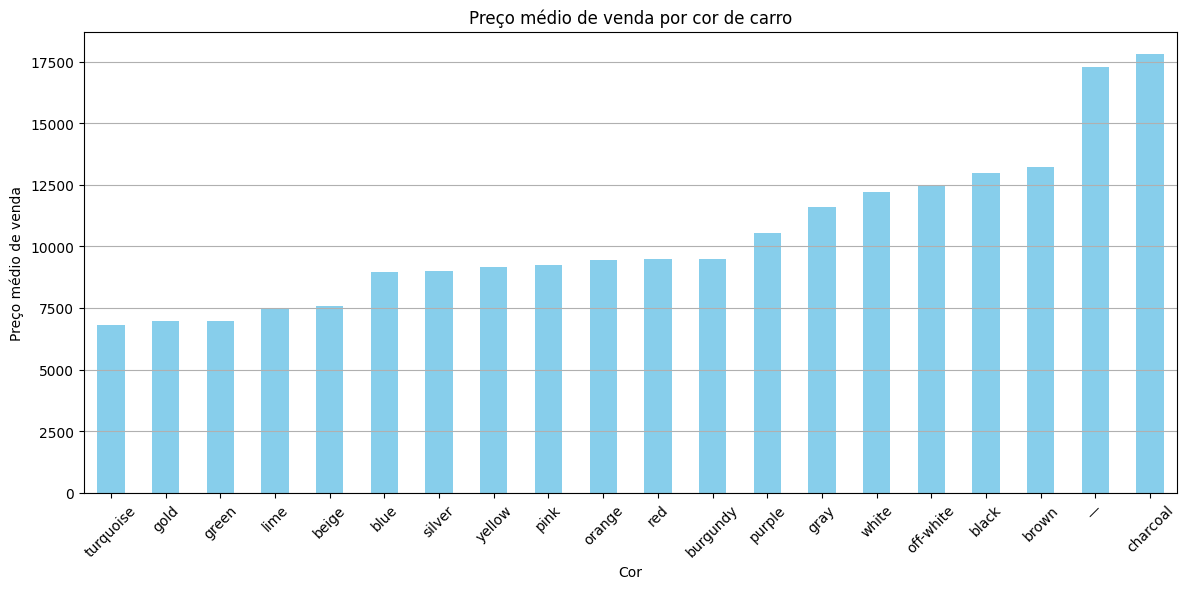

In [54]:
average_prices_by_color = cars.groupby('color')['sellingprice'].mean().sort_values()

plt.figure(figsize=(12, 6))
average_prices_by_color.plot(kind='bar', color='skyblue')
plt.title('Preço médio de venda por cor de carro')
plt.xlabel('Cor')
plt.ylabel('Preço médio de venda')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Como o preço de venda se compara com o valor estimado pelo MMR (Manheim Market Report)?**



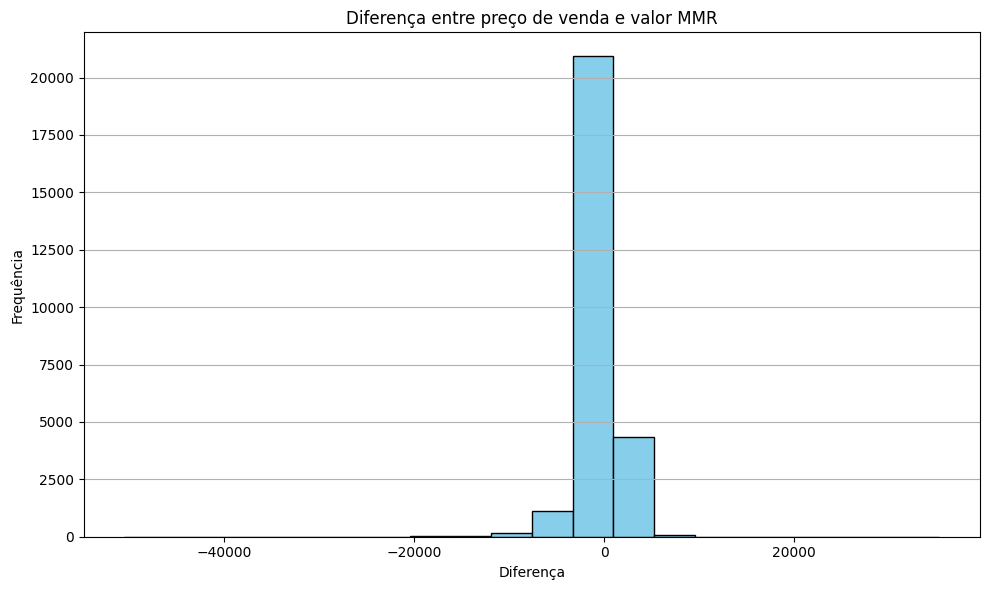

In [56]:
cars['mmr_difference'] = cars['sellingprice'] - cars['mmr']

# Visualizar a distribuição da diferença entre o preço de venda e o valor MMR
plt.figure(figsize=(10, 6))
cars['mmr_difference'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Diferença entre preço de venda e valor MMR')
plt.xlabel('Diferença')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


os valores de venda estão alinhados com os valores estimados pelo MMR. No entanto, há uma dispersão considerável na diferença, com alguns carros sendo vendidos acima ou abaixo do valor estimado. Isso sugere que enquanto o MMR é uma boa referência, outros fatores também podem influenciar os preços de venda.

# **Quais modelos de carros têm a menor depreciação ao longo do tempo?**

In [61]:
cars['depreciation'] = cars['sellingprice'] - cars['mmr']

average_depreciation_by_model = cars.groupby('model')['depreciation'].mean().sort_values()

models_with_lowest_depreciation = average_depreciation_by_model.head(10)

print(models_with_lowest_depreciation)

model
ActiveHybrid X6     -8000.0
Ghost               -7200.0
TTS                 -7150.0
capt                -7150.0
ATS                 -6100.0
Verano              -5800.0
GT-R                -5500.0
ELR                 -5400.0
SLS AMG             -5200.0
Mustang SVT Cobra   -4850.0
Name: depreciation, dtype: float64


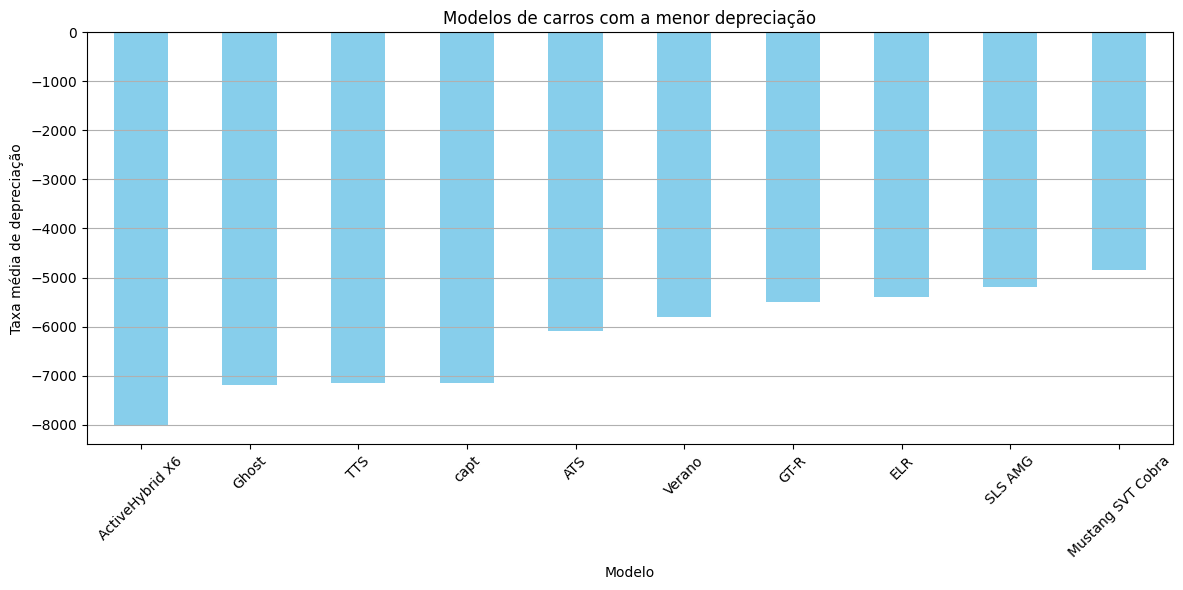

In [60]:
cars['depreciation'] = cars['sellingprice'] - cars['mmr']

average_depreciation_by_model = cars.groupby('model')['depreciation'].mean().sort_values()

top_10_models = average_depreciation_by_model.head(10)

plt.figure(figsize=(12, 6))
top_10_models.plot(kind='bar', color='skyblue')
plt.title('Top 10 Modelos de carros com a menor depreciação')
plt.xlabel('Modelo')
plt.ylabel('Taxa média de depreciação')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Qual é a relação entre o tipo de transmissão do veículo e seu preço de venda?**

<Figure size 1000x600 with 0 Axes>

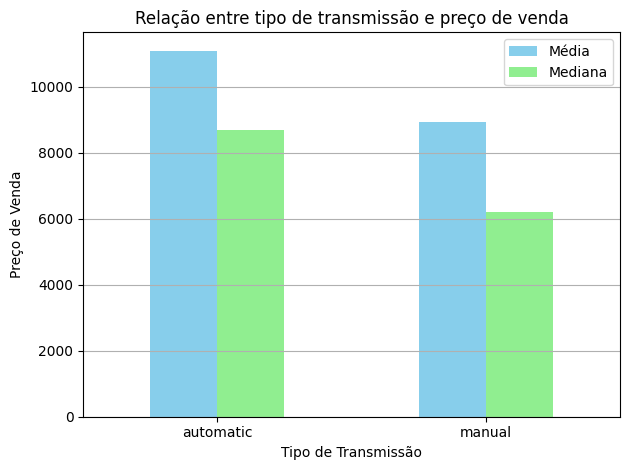

In [62]:
summary_stats_by_transmission = cars.groupby('transmission')['sellingprice'].describe()

plt.figure(figsize=(10, 6))
summary_stats_by_transmission[['mean', '50%']].plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Relação entre tipo de transmissão e preço de venda')
plt.xlabel('Tipo de Transmissão')
plt.ylabel('Preço de Venda')
plt.xticks(rotation=0)
plt.legend(['Média', 'Mediana'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()